In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


### Î¨∏Ï†ú ÌååÏïÖ
- ÌÉÄÏù¥ÌÉÄÎãâ Ïö∞Ï£ºÏÑ†Ïù¥ ÏãúÍ≥µÍ∞Ñ Î≥ÄÏπôÏÑ±Í≥º Ï∂©ÎèåÌñàÎã§.
- Í∑∏ ÏïàÏóê ÌÉÄÍ≥† ÏûàÎçò 13000Î™ÖÏùò ÏäπÍ∞ù Ï§ë Ï†àÎ∞òÏù¥ ÏÇ¨Í≥†Ïóê ÏùòÌïòÏó¨ Îã§Î•∏ Ï∞®ÏõêÏúºÎ°ú Ïù¥ÏÜ°ÎêòÏóàÎã§.
- ÏÜêÏÉÅÎêú Ïª¥Ìì®ÌÑ∞ ÏãúÏä§ÌÖúÏóêÏÑú Î≥µÍµ¨Îêú Í∏∞Î°ùÏùÑ ÏÇ¨Ïö©Ìï¥ Ïñ¥Îñ§ ÏäπÍ∞ùÏù¥ Î≥ÄÏπôÏ†ÅÏúºÎ°ú Ïö¥ÏÜ°ÎêòÏóàÎäîÏßÄ ÏòàÏ∏°Ìï¥Ïïº ÌïúÎã§.
- ÎÇ¥ ÏûÑÎ¨¥Îäî Ïö∞Ï£ºÏÑ† ÌÉÄÏù¥ÌÉÄÎãâÏù¥ Ïù¥ ÏãúÍ≥µÍ∞Ñ Ïù¥ÏÉÅÍ≥º Ï∂©ÎèåÌïòÎäî ÎèôÏïà ÏäπÍ∞ùÏù¥ Îã§Î•∏ Ï∞®ÏõêÏúºÎ°ú Ïù¥ÏÜ°ÎêòÏóàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥Îã§.

### ÌååÏùº Î∞è Îç∞Ïù¥ÌÑ∞ ÌïÑÎìú
- train.csv - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©ÎêòÎäî ÏäπÍ∞ùÏùò ÏïΩ 2/3(~8700)Ïóê ÎåÄÌïú Í∞úÏù∏ Í∏∞Î°ù.
   - PassengerId- Í∞Å ÏäπÍ∞ùÏóê ÎåÄÌïú Í≥†Ïú† ID. Í∞Å IDÎäî ÏäπÍ∞ùÏù¥ Ìï®Íªò Ïó¨ÌñâÌïòÎäî Í∑∏Î£π gggg_ppÏùÑ ggggÎÇòÌÉÄÎÇ¥Î©∞ ppÎäî Í∑∏Î£π ÎÇ¥ Î≤àÌò∏. Í∑∏Î£πÏùò ÏÇ¨ÎûåÎì§ÏùÄ Î≥¥ÌÜµ Í∞ÄÏ°± Íµ¨ÏÑ±ÏõêÏù¥ÏßÄÎßå Ìï≠ÏÉÅ Í∑∏Îü∞ Í≤ÉÏùÄ ÏïÑÎãàÎã§.
   - HomePlanet- ÏäπÍ∞ùÏù¥ Ï∂úÎ∞úÌïú ÌñâÏÑ±, ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏòÅÍµ¨ Í±∞Ï£º ÌñâÏÑ±.
   - CryoSleep- ÏäπÍ∞ùÏù¥ Ìï≠Ìï¥ Í∏∞Í∞Ñ ÎèôÏïà Ï†ïÏßÄÎêú Ïï†ÎãàÎ©îÏù¥ÏÖòÏóê ÎÜìÏù¥ÎèÑÎ°ù ÏÑ†ÌÉùÌñàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ∏Îã§. cryosleepÏùò ÏäπÍ∞ùÏùÄ Í∞ùÏã§Ïóê Íµ≠ÌïúÎêúÎã§.
   - Cabin- ÏäπÍ∞ùÏù¥ Î®∏Î¨ºÍ≥† ÏûàÎäî Í∞ùÏã§ Î≤àÌò∏. Deck/num/side ÌòïÏãùÏùÑ Ï∑®ÌïòÎ©∞, Ïó¨Í∏∞ÏóêÏÑú sideÎäî PortÏùò Í≤ΩÏö∞ P ÎòêÎäî StarboardÏùò Í≤ΩÏö∞ SÏùº Ïàò ÏûàÎã§.
   - Destination- Î™©Ï†ÅÏßÄ
   - Age- ÏäπÍ∞ùÏùò ÎÇòÏù¥.
   - VIP- ÏäπÍ∞ùÏù¥ Ìï≠Ìï¥ Ï§ë ÌäπÎ≥Ñ VIP ÏÑúÎπÑÏä§Î•º ÏßÄÎ∂àÌñàÎäîÏßÄ Ïó¨Î∂Ä.
   - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - ÏäπÍ∞ùÏù¥ Ïö∞Ï£ºÏÑ† ÌÉÄÏù¥ÌÉÄÎãâÏùò Îã§ÏñëÌïú Í≥†Í∏â Ìé∏Ïùò ÏãúÏÑ§Ïóê ÎåÄÌï¥ Ï≤≠Íµ¨Ìïú Í∏àÏï°.
   - Name- ÏäπÍ∞ùÏùò ÏÑ±Í≥º Ïù¥Î¶Ñ.
   - Transported- ÏäπÍ∞ùÏù¥ Îã§Î•∏ Ï∞®ÏõêÏúºÎ°ú Ïù¥ÏÜ°ÎêòÏóàÎäîÏßÄ Ïó¨Î∂Ä. Ïù¥Í≤ÉÏùÄ ÏòàÏ∏°ÌïòÎ†§Îäî ÎåÄÏÉÅÏù∏ Ïó¥.
- test.csv - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©ÎêòÎäî ÎÇòÎ®∏ÏßÄ ÏäπÍ∞ùÏùò 1/3(~4300)Ïóê ÎåÄÌïú Í∞úÏù∏ Í∏∞Î°ù. TransportedÎãπÏã†Ïùò ÏûÑÎ¨¥Îäî Ïù¥ ÏÑ∏Ìä∏Ïóê ÏûàÎäî ÏäπÍ∞ùÏùò Í∞ÄÏπòÎ•º ÏòàÏ∏°ÌïòÎäî Í≤É.
- sample_submission.csv - Ïò¨Î∞îÎ•∏ ÌòïÏãùÏùò Ï†úÏ∂ú ÌååÏùº.
 - PassengerId- ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Í∞Å ÏäπÍ∞ùÏóê ÎåÄÌïú ID.
 - Transported- Î™©Ìëú. Í∞Å ÏäπÍ∞ùÏóê ÎåÄÌï¥ True ÎòêÎäî FalseÎ•º ÏòàÏ∏°.

# Step1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
- ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏

In [2]:
from IPython.display import clear_output
#!pip3 install -U lazypredict
#!pip3 install -U pandas #Upgrading pandas

clear_output()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split


#from lightgbm import LGBMClassifier
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
print("numpy version is : ", np.__version__)
print("pandas version is : ", pd.__version__)
print("seaborn version is : ", sns.__version__)

numpy version is :  1.20.3
pandas version is :  1.3.5
seaborn version is :  0.11.2


In [5]:
# Data Loading and Preparation

train = pd.read_csv("../input/spaceship-titanic/train.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'

üìå Í∏∞Ï∞® Îç∞Ïù¥ÌÑ∞Ïùò Í¥ÄÏ∞∞:
* Í∏∞Ï∞® Îç∞Ïù¥ÌÑ∞Îäî Ï¥ù 14Í∞úÏùò Ïó¥Í≥º 8693Í∞úÏùò ÌñâÏù¥ ÏûàÎã§.
* Í∏∞Ï∞® Îç∞Ïù¥ÌÑ∞ÏóêÎäî 2324Í∞úÏùò Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî 119378Í∞úÏùò Í¥ÄÏ∏°Í∞íÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§.
* 12Í∞úÏùò Î™®Îì† Í∏∞Îä• Ïó¥ÏóêÎäî Í≤∞Ï∏°Í∞íÏù¥ ÏûàÏúºÎ©∞ CryoSleepÏóêÏÑúÎäî Í≤∞Ï∏°Í∞íÏù¥ Í∞ÄÏû• ÎÜíÏùå(217)
* TransportedÎäî Í∏∞Ï∞® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏóêÏÑúÎßå ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÎåÄÏÉÅ Î≥ÄÏàòÏù¥Îã§.

In [6]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [7]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}]')
print(f'\033[94mNumber of colunmns in train data: {train.shape[1]}]')
print(f'\033[94mNumber of values in train data: {train.count().sum()}]')
print(f'\033[94mNumber of missing values in train data: {sum(train.isna().sum())}]')
# Ïù¥ Î©îÏÑúÎìúÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎÇ¥Ïóê Í≤∞Ï∏° Í∞íÏùÑ ÌôïÏù∏ÌïòÏó¨, Í∑∏ Í≤∞Í≥ºÎ•º True ÎòêÎäî FalseÎ°ú Î∞òÌôò

Number of rows in train data: 8693]
Number of colunmns in train data: 14]
Number of values in train data: 119378]
Number of missing values in train data: 2324]


- Ïó¥Î≥Ñ Í≤∞Ï∏°Í∞í

In [8]:
print(f'\033[94m')
print(train.isna().sum().sort_values(ascending = False))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


- Îã§ÏùåÏùÄ Í∞úÏàò, ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜåÍ∞í, 1ÏÇ¨Î∂ÑÏúÑÏàò, Ï§ëÏïôÍ∞í, 3ÏÇ¨Î∂ÑÏúÑÏàò Î∞è ÏµúÎåÄÍ∞íÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÎäî Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú Í∏∞Î≥∏ ÌÜµÍ≥ÑÏù¥Îã§.

In [9]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

üìå ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í¥ÄÏ∞∞:
* ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ï¥ù 13Ïó¥ 4277ÌñâÏûÖÎãàÎã§.
* Í∏∞Ï∞® Îç∞Ïù¥ÌÑ∞ÏóêÎäî 1117Í∞úÏùò Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî 54484Í∞úÏùò Í¥ÄÏ∏°Í∞íÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
* 12Í∞úÏùò Î™®Îì† Í∏∞Îä• Ïó¥ÏóêÎäî Í≤∞Ï∏°Í∞íÏù¥ ÏûàÏúºÎ©∞ FoodCourtÎäî Í≤∞Ï∏°Í∞íÏù¥ Í∞ÄÏû• ÎÜíÏùå(106)

In [10]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [11]:
print(f'\033[94mNumber of row in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[94mNumber of values in train data: {test.count().sum()}')
print(f'\033[94mNumber of row with missing values in tset data: {sum(test.isna().sum())}')

Number of row in test data: 4277
Number of columns in test data: 13
Number of values in train data: 54484
Number of row with missing values in tset data: 1117


- Ïó¥Î≥Ñ Í≤∞Ï∏°Í∞í

In [12]:
print(f'\033[94')
print((test.isna().sum().sort_values(ascending = False)))

[94
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


- Îã§ÏùåÏùÄ Í∞úÏàò, ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜåÍ∞í, 1ÏÇ¨Î∂ÑÏúÑÏàò, Ï§ëÏïôÍ∞í, 3ÏÇ¨Î∂ÑÏúÑÏàò Î∞è ÏµúÎåÄÍ∞íÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÎäî Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú Í∏∞Î≥∏ ÌÜµÍ≥ÑÏù¥Îã§.

In [13]:
test.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000

- submission File

In [14]:
submission.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

# Step2. ÌÉêÏÉâÏ†Å ÏûêÎ£å Î∂ÑÏÑù (EDA)
- Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- ÏÇ∞Ï†êÎèÑ, ÎßâÎåÄ Í∑∏ÎûòÌîÑ Îì±
- Í∑∏ÎûòÌîÑ Ìï¥ÏÑùÌï¥ÏÑú ÏÑ§Î™ÖÏùÑ Îã¨ÏïÑÏïº Ìï®
- ÏïΩÍ∞ÑÏùò Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

- Îç∞Ïù¥ÌÑ∞ Í∞úÏöî

In [15]:
train.drop(["PassengerId"] , axis = 1 , inplace = True)
test.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col not in ['id', TARGET]]
RANDOM_STATE = 12 

In [16]:

train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')


üìå ÎÑêÍ∞í Î∂ÑÌè¨Ïóê ÎåÄÌïú Í¥ÄÏ∞∞:
* ÌñâÏùò Í≤∞Ï∏°Í∞íÏùò ÏµúÎåÄÍ∞íÏùÄ 3Ïù¥Í≥† ÏµúÏÜåÍ∞íÏùÄ Í≤∞Ï∏°Í∞íÏù¥ ÏóÜÏùå
* Ìù•ÎØ∏Î°≠Í≤åÎèÑ Í≤∞Ï∏°Í∞í Î∂ÑÌè¨(Ìñâ Í∏∞Ï§Ä)Îäî ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Í∞ÑÏóê ÏÉÅÎãπÌûà ÎèôÏùº.
* Í≤∞Ï∏°Í∞íÏù¥ ÏóÜÎäî Í¥ÄÏ∏°Í∞í(Ìñâ Í∏∞Ï§Ä)Ïù¥ ÏïΩ 76% ÏûàÎã§.
* 1~3Í∞úÏùò Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Í¥ÄÏ∏°Ïπò(Ìñâ Í∏∞Ï§Ä)Ïùò ÎÇòÎ®∏ÏßÄ 24%

- Ïó¥Î≥Ñ Null Í∞í Î∂ÑÌè¨

- ÌñâÎ≥Ñ Null Í∞í Î∂ÑÌè¨

In [17]:
test_null = pd.DataFrame(test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values")

fig.add_trace(go.Bar(x=train_null[0],
                     y=train_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=test_null[0], 
                     y=test_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)', 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

In [18]:
missing_train_row = train.isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train.shape[0]).reset_index()
missing_test_row = test.isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']
missing_test_row.columns = ['no', 'count']
missing_train_row["count"] = missing_train_row["count"]*100
missing_test_row["count"] = missing_test_row["count"]*100


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values",)

fig.add_trace(go.Bar(x=missing_train_row["no"], 
                     y=missing_train_row["count"]  ,
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)' ,
                                line_width = 3
                                ,coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x= missing_test_row["no"], 
                     y=missing_test_row["count"],
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)',
                                line_width = 3 ,
                                coloraxis="coloraxis")),
              1, 2)
fig.update_layout(showlegend=False, title_text="Row wise Null Value Distribution", title_x=0.5)

# Step3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Feature Engineering Ïù¥ÎùºÍ≥†ÎèÑ ÌïúÎã§
- ML Î™®ÌòïÏùÑ ÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ ÌëúÏ§ÄÌôî Îì± / ÏõêÌï´-Ïù∏ÏΩîÎî©
- ÌååÏÉùÎ≥ÄÏàò (ÎèÑÏ∂ú Î≥ÄÏàò) ÎßåÎì§Í∏∞
    + Ïôú Ïù¥ Î≥ÄÏàòÎ•º ÎßåÎì§ÏóàÎäîÏßÄÏóê ÎåÄÌïú Î≥∏Ïù∏Ïùò ÏÑ§Î™Ö ÌïÑÏöî

### Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ (Ï∞∏Ï°∞)
- Í≤∞Ï∏° Í∞íÏùÑ Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏóê ÎåÄÌïú Î™á Í∞ÄÏßÄ Ï∞∏Ï°∞:
    - Alexis CookÏùò Í≤∞Ï∏°Í∞í
    - Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ Í≥ºÏ†ú: Rachael TatmanÏùò Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
    - Parul PandeyÏùò PythonÏóêÏÑú ÎàÑÎùΩÎêú Í∞í Ï≤òÎ¶¨ Í∞ÄÏù¥Îìú

- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Í≤∞Ï∏°Í∞íÏùÑ Ï≤òÎ¶¨ÌïòÎäî Í∏∞Îä•Ïù¥ ÏûàÎäî ÏùºÎ∂Ä Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.
    - XGBoost: https://xgboost.readthedocs.io/en/latest/faq.html
    - LightGBM: https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html
    - Catboost: https://catboost.ai/docs/concepts/algorithm-missing-values-processing.html

### Ïó∞ÏÜçÏÑ±Í≥º Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
üìå ÎÑêÍ∞í Î∂ÑÌè¨ÏóêÏÑú Í¥ÄÏ∞∞:
* 12Í∞úÏùò Í∏∞Îä• Ï§ë 6Í∞úÏùò Í∏∞Îä•ÏùÄ Ïó∞ÏÜçÌòï, 2Í∞úÏùò Í∏∞Îä•ÏùÄ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞, 4Í∞úÏùò Í∏∞Îä•ÏùÄ Î≤îÏ£ºÌòïÏûÖÎãàÎã§.
* HomePlanetÍ≥º DestinationÏùÄ 3Í∞ÄÏßÄ Í≥†Ïú†Ìïú Í∞íÏùÑ Í∞ÄÏßëÎãàÎã§.
* CryoSleep Î∞è VIPÎäî bool Í∏∞Îä•ÏûÖÎãàÎã§.

In [19]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


### Ïó∞ÏÜçÏ†ÅÏù∏ ÌäπÏÑ±Ïùò ÌäπÏÑ± Î∂ÑÌè¨
- ÎÇòÏù¥ Î∂ÑÌè¨

- Î≤îÏ£ºÌòï ÌäπÏÑ±Ïùò ÌäπÏÑ± Î∂ÑÌè¨

In [20]:
train_age = train.copy()
test_age = test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

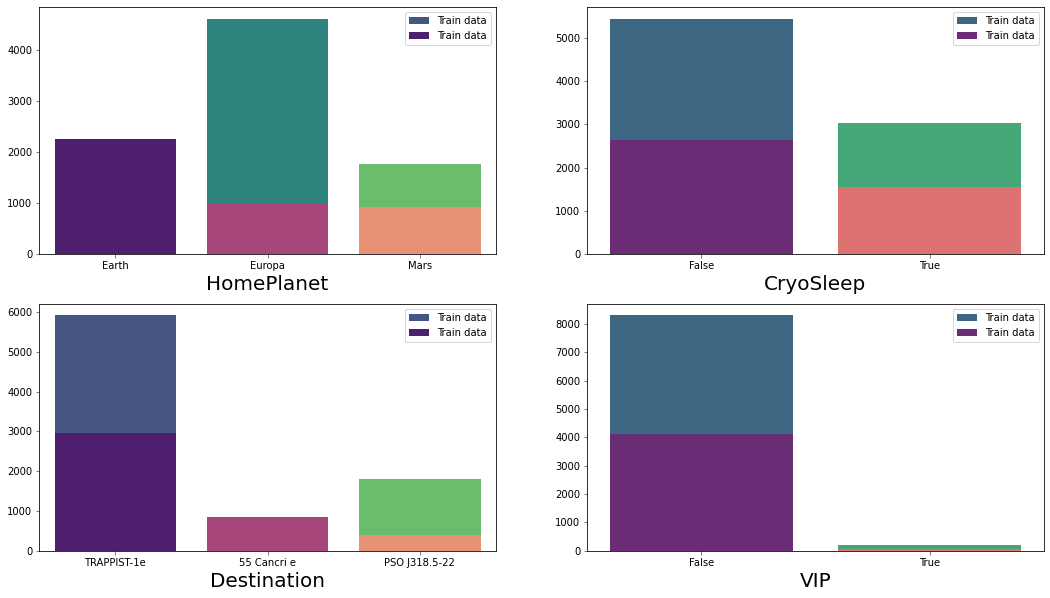

In [21]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(train[col],ax = axes[r,c] ,palette = "viridis", label='Train data')
            sns.countplot(test[col],ax = axes[r,c] ,palette = "magma", label='Train data')
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

# Step4. Î®∏Ïã†Îü¨Îãù Î™®Ìòï Í∞úÎ∞ú
- Î™®ÌòïÏóê ÎåÄÌïú ÏÑ§Î™Ö
- Î™®ÌòïÏùÑ 1-2Í∞ú ÏÇ¨Ïö©
- ÍµêÏ∞® Í≤ÄÏ¶ù
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

### Target Î∂ÑÌè¨
üìå ÎÑêÍ∞í Î∂ÑÌè¨ÏóêÏÑú Í¥ÄÏ∞∞:
* Î™©ÌëúÍ∞íÏùÄ 0Í≥º 1Ïù¥ ÏûàÏäµÎãàÎã§.
* Îëê Î™©ÌëúÍ∞íÏùÄ Í±∞Ïùò Í∑†Îì±ÌïòÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

In [22]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count'
            ) 
fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / train.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / train.shape[0]))
fig.show()

Percentage of Transported = 0: 50.36 %
Percentage of Transported = 1: 49.64 %


### Correlation matrix ÏÉÅÍ¥Ä ÌñâÎ†¨

In [23]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Í≤∞Ï∏°Í∞í ÎåÄÏûÖ
- Î≤îÏ£ºÌòï ÌäπÏÑ± Ïù∏ÏΩîÎî©

In [24]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

In [25]:
"""
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train,test ,label_cols)
"""

'\nlabel_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]\ndef label_encoder(train,test,columns):\n    for col in columns:\n        train[col] = train[col].astype(str)\n        test[col] = test[col].astype(str)\n        train[col] = LabelEncoder().fit_transform(train[col])\n        test[col] =  LabelEncoder().fit_transform(test[col])\n    return train, test\n\ntrain ,test = label_encoder(train,test ,label_cols)\n'

In [26]:
"""
train.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = train.drop(TARGET , axis =1 )
y = train[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)
"""

'\ntrain.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)\ntest.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)\nX = train.drop(TARGET , axis =1 )\ny = train[TARGET]\nX_train , X_test , y_train , y_test = train_test_split(X , \n                                                       y, \n                                                       random_state = 12 ,\n                                                       test_size =0.33)\n'

### Î™®Îç∏ÎßÅ
- LGBM Classifier(5FOLDS):

In [27]:
"""
lgb_params = {
    'objective' : 'binary',
    'n_estimtors' : 50,
    'learning_rate' : 0.08
}

lgb_predictions = 0
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = mode.predict(X_valid)
    acc = accuracy_score(y_valid, pred_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    
    fim = pd.DataFrmae(indx=LGBM_FEATURES,
                      data=model.feature_importances_,
                      columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    
    pirnt(f"Fold={fold+1}, Accuracy score : {acc:.2f}%, Run Time: {run_tima:.2f}s")
    test_preds = model.predict(test[LGBM_FEATURES])
    lgb_predictions += test_preds/FOLDS

print("")
print("Mean Accuracy : ", np.mean(lgb_scores))
"""

'\nlgb_params = {\n    \'objective\' : \'binary\',\n    \'n_estimtors\' : 50,\n    \'learning_rate\' : 0.08\n}\n\nlgb_predictions = 0\n    \n    model = LGBMClassifier(**lgb_params)\n    model.fit(X_train, y_train,verbose=0)\n    \n    preds_valid = mode.predict(X_valid)\n    acc = accuracy_score(y_valid, pred_valid)\n    lgb_scores.append(acc)\n    run_time = time.time() - start_time\n    \n    fim = pd.DataFrmae(indx=LGBM_FEATURES,\n                      data=model.feature_importances_,\n                      columns=[f\'{fold}_importance\'])\n    lgb_fimp.append(fim)\n    \n    pirnt(f"Fold={fold+1}, Accuracy score : {acc:.2f}%, Run Time: {run_tima:.2f}s")\n    test_preds = model.predict(test[LGBM_FEATURES])\n    lgb_predictions += test_preds/FOLDS\n\nprint("")\nprint("Mean Accuracy : ", np.mean(lgb_scores))\n'

# Step5. 
- ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ Ï™ºÍ∞†Îã§. ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ + Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
- Ï†ïÌôïÎèÑ ÎπÑÍµê
- ÌòºÎèôÌñâÎ†¨(Confusion Matriax) ÏÑ§Î™Ö -> Ïä§Ïä§Î°ú Ï∞æÏïÑÎ≥¥Í≥† ÏÑ§Î™ÖÏùÑ ÎÑ£ÎäîÎã§

# Step6. Ï†úÏ∂ú
- Ï†úÏ∂ú ÏñëÏãùÏùÄ ÏÉòÌîå ÎßåÎì§Ïñ¥ÏßÄÎäîÍ±∞ Î≥¥Í≥† Ï∞∏Í≥†

# Reference
- Îã§Î•∏ ÏÇ¨ÎûåÏùò code ÏÑ§Î™ÖÏùÑ Îî∞ÎùºÏπúÎã§Î©¥ Ìï¥Ïïº Ìï®.
- ÎÖ∏Ìä∏Î∂Å ÌëúÏ†à Î∞©ÏßÄ ÏúÑÌï¥, Î≥∏Ïù∏Ïù¥ Ï∞∏Ï°∞Ìïú ÏΩîÎìúÎäî Î∞òÎìúÏãú ÎßÅÌÅ¨ Í±∏Ïñ¥Îëò Í≤É.
- [Ï†ÄÏûê Ïù¥Î¶Ñ, Í∏Ä Ï†úÎ™©, ÎßÅÌÅ¨ Ï£ºÏÜå]
- SANSKAR HASIJA, üöÄSpaceship Titanic -üìäEDA + 27 different modelsüìà, https://www.kaggle.com/code/odins0n/spaceship-titanic-eda-27-different-models



# ÎßàÍ∞êÏùº
- 4Ïõî 12Ïùº 17Ïãú 40Î∂Ñ
- Ï†úÏ∂ú ÌòïÌÉú
    + Leaderbord Îû≠ÌÇπ ÏÇ¨ÏßÑ Ï∫°Ï≤ò
    + Í≥†Ïö©ÎÖ∏ÎèôÎ∂Ä Î≥¥Í≥† ÏñëÏãù(Îã§ÏùåÏ£ºÏóê ÌôïÏù∏Ìï¥ÏÑú Í≥µÏßÄÏòàÏ†ï)